# Improving Employee Retention: A Research Proposal

## The problem
Employers will take one of two approaches to employee retention efforts. Some enforce high turnover rates for a variety of reasons, including not budgeting for proper training or because such positions are easily re-filled. Other companies invest many resources in their employees and lose some of that investment to attrition. However, there is strong evidence that the latter is still more cost-effective and productive in reaching company goals. One [Forbes article](https://www.forbes.com/sites/billconerly/2018/08/12/companies-need-to-know-the-dollar-cost-of-employee-turnover/#6f09a1e8d590) claims the cost can vary between 50 - 200% of an employees salary to replace and train someone new, depending on job level. Though this proposal utilizes a dataset for IBM employees, theoretically, any interested company can regularly release employee surveys with these same questions and utilize this proposal as a backbone to plan their own retention strategies.


### Data source
Below, I'm using a dataset that IBM data scientists generated regarding employee attrition rates and a variety of parameters that may be responsible. Survey data is one of the easiest and cost effective means of reporting employee satisfaction rates. In this particular survey, scales are from 1-4 with 1 referring to 'Low' or 'Bad', and 4 referring to 'Very high' or 'Best.' Not all of the data is carefully described, so I will make some assumptions (that should not be made in a real world setting) and list them below.

Assumptions:
- attrition is documented at one year after survey release
- relationship satisfaction is regarding amicable experiences with fellow employees


Data: https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset/home

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [3]:
df = pd.read_csv('IBM-HR-Employee-Attrition.csv')

In [4]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

## A glance at the data

In [5]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Data cleaning
There are some aspects of an employees life that IBM cannot control (such as how far a commute to work is), therefore, I will drop all columns that would not be useful in helping IBM retain their employees. Though there are some parameters that may be useful to consider in future hiring, I will drop those as well if it's not helpful information in keeping those already employed. My primary goal here is for maintaining current employee loyalty. However, I will leave some variables that are known to be a source of discrimination in the workplace, such as age. I'm also omitting all measures of pay, except for hourly rates, because they will all provide essentially the same information.

In [7]:
df = df.loc[:, ['Age', 'Attrition', 'BusinessTravel', 'Department',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'RelationshipSatisfaction',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'StockOptionLevel', 
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]

In [8]:
df.describe()

,Age,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,RelationshipSatisfaction,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,2.721769,65.891156,2.729932,2.063946,2.728571,2.712245,15.209524,3.153741,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,1.093082,20.329428,0.711561,1.106940,1.102846,1.081209,3.659938,0.360824,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1.000000,11.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2.000000,12.000000,3.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,3.000000,66.000000,3.000000,2.000000,3.000000,3.000000,14.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,4.000000,83.750000,3.000000,3.000000,4.000000,4.000000,18.000000,3.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,4.000000,100.000000,4.000000,5.000000,4.000000,4.000000,25.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Explore retention rates

In [9]:
left = df[df.Attrition == 'Yes']
retained = df[df.Attrition=='No']

In [10]:
left.describe()

,Age,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,RelationshipSatisfaction,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,2.464135,65.573840,2.518987,1.637131,2.468354,2.599156,15.097046,3.156118,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,1.169791,20.099958,0.773405,0.940594,1.118058,1.125437,3.770294,0.363735,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.000000,31.000000,1.000000,1.000000,1.000000,1.000000,11.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.000000,50.000000,2.000000,1.000000,1.000000,2.000000,12.000000,3.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,3.000000,66.000000,3.000000,1.000000,3.000000,3.000000,14.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,4.000000,84.000000,3.000000,2.000000,3.000000,4.000000,17.000000,3.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,4.000000,100.000000,4.000000,5.000000,4.000000,4.000000,25.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [11]:
retained.describe()

,Age,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,RelationshipSatisfaction,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,2.771290,65.952149,2.770479,2.145985,2.778589,2.733982,15.231144,3.153285,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,1.071132,20.380754,0.692050,1.117933,1.093277,1.071603,3.639511,0.360408,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1.000000,11.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2.000000,12.000000,3.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,3.000000,66.000000,3.000000,2.000000,3.000000,3.000000,14.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,3.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,4.000000,100.000000,4.000000,5.000000,4.000000,4.000000,25.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


In [12]:
print("Attrition rates of IBM employees: ", len(left)/len(retained))

Attrition rates of IBM employees:  0.1922141119221411


Perhaps this attrition rate differs across departments.

In [13]:
depts = df.Department.unique()
print("Departments included: ", depts)

Departments included:  ['Sales' 'Research & Development' 'Human Resources']


In [14]:
print("Attrition rates per department: ")
for dept in depts:
    print(dept, ":  ", len(left[left.Department == dept]) / len(df[df.Department == dept]))

Attrition rates per department: 
Sales :   0.2062780269058296
Research & Development :   0.1383975026014568
Human Resources :   0.19047619047619047


Interesting, worthwhile to see why R&D may have significantly better retention than Sales and HR and perhaps try to model that environment. Below I will look at departmental differences in the variables.

In [15]:
left['Department'].value_counts()

Research & Development    133
Sales                      92
Human Resources            12
Name: Department, dtype: int64

In [16]:
retained['Department'].value_counts()

Research & Development    828
Sales                     354
Human Resources            51
Name: Department, dtype: int64

General rule of thumb in statistics requires a sample to be of at least size 30, which the attrition group of HR does not meet. For this reason, I likely will not be able to conclude anything reliable regarding that department and will instead focus on R&D and Sales.


Below I will run some statistical tests (Mann-Whitney) that does not assume normality across the samples. These will help steer focus on factors directly influencing attrition rates.

In [17]:
depts = ['Research & Development', 'Sales']

In [20]:
from scipy.stats import mannwhitneyu

In [21]:
columns = ['Age',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'RelationshipSatisfaction',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'StockOptionLevel', 
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']
for dept in depts:
    print(dept, "\n")
    for column in columns:
        print(column)
        print(mannwhitneyu(left[left.Department == dept][column], retained[retained.Department==dept][column]))
        print("\n")
    print("\n")

Research & Development 

Age
MannwhitneyuResult(statistic=39127.0, pvalue=4.021915896592603e-08)


EnvironmentSatisfaction
MannwhitneyuResult(statistic=47004.0, pvalue=0.0024195682172469574)


Gender
MannwhitneyuResult(statistic=50520.0, pvalue=0.035483500964093063)


HourlyRate
MannwhitneyuResult(statistic=53829.0, pvalue=0.3391228846797934)


JobInvolvement
MannwhitneyuResult(statistic=47015.5, pvalue=0.001109931481513788)


JobLevel
MannwhitneyuResult(statistic=35511.0, pvalue=1.1558304688415182e-12)


JobRole
MannwhitneyuResult(statistic=53875.0, pvalue=0.34066704778281653)


JobSatisfaction
MannwhitneyuResult(statistic=46465.5, pvalue=0.001326854008861614)


RelationshipSatisfaction
MannwhitneyuResult(statistic=49358.0, pvalue=0.023232927765835226)


OverTime
MannwhitneyuResult(statistic=37526.5, pvalue=1.8349947964310142e-14)


PercentSalaryHike
MannwhitneyuResult(statistic=53529.0, pvalue=0.30194619509368814)


PerformanceRating
MannwhitneyuResult(statistic=52943.0, pvalue=0.132

To summarize the test results above, both Sales and R&D had significant differences in these factors between attrition and retention groups: 
- age
- environment satisfaction
- job involvement
- job level
- job satisfaction
- overtime
- stock option level
- total working years
- years at company
- years in current role
- years with current manager

R&D had additional differences:
- gender
- relationship satisfaction
- training times last year
- work life balance
- years since last promotion

Sales had additional differences:
- job role



#### Though sales has higher attrition rates, I would like to explore R&D further as there seems to be more determinant factors.

In [22]:
df_rnd = df[df.Department=='Research & Development']
df_rnd.head()

,Age,Attrition,BusinessTravel,Department,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,...,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,No,Travel_Frequently,Research & Development,3,Male,61,2,2,Research Scientist,...,23,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,4,Male,92,2,1,Laboratory Technician,...,15,3,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,4,Female,56,3,1,Research Scientist,...,11,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,1,Male,40,3,1,Laboratory Technician,...,12,3,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,Research & Development,4,Male,79,3,1,Laboratory Technician,...,13,3,0,8,2,2,7,7,3,6


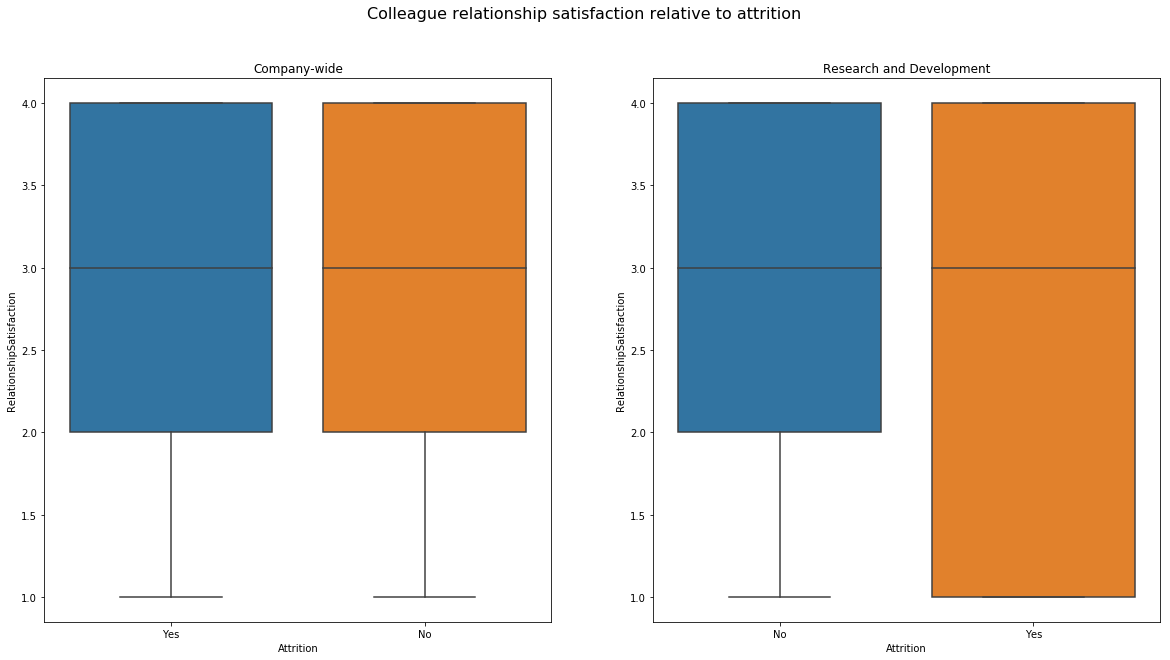

In [30]:
fig, axs = plt.subplots(ncols=2,nrows=1)

fig.suptitle("Colleague relationship satisfaction relative to attrition", fontsize=16)

ax = sns.boxplot(x='Attrition', y='RelationshipSatisfaction', data=df, ax=axs[0])
ax.set_title("Company-wide")



ax = sns.boxplot(x='Attrition', y='RelationshipSatisfaction', data=df_rnd, ax=axs[1])
ax.set_title("Research and Development")
plt.show()

The figures above are clear examples of why Simpson's paradox must be considered before taking the averages across all groups. Initially, I considered looking at factors leading to attrition of all employees; however, in my experience, departments within a company can be managed entirely different and lead to vastly different turnover rates. I decided to focus specifically within departments. As noted above, relationship satisfaction is not necessarily important in attrition across the entire company, but can be indicative within the R&D department. In Research and Development, There is a greater amount of employees who left that rated their perception of coworker relationship statuses as 2 or lower from a scale of 1-4.

For this reason, I will focus my attentions to improving employee retention in R&D with regards to colleague relationship satisfaction.

## Pre-rollout plan
Assuming these surveys were not recently taken, I suggest sending out an additional round of surveys as a pre-experiment baseline across all of R&D. With these new surveys, I would also change the scale in the perception-related questions from its original 1-4 to 1-10. It's much easier for the human brain to quantify their experience when there is a wider range of number to choose from (such as 5 if they feel entirely neutral - which 1-4 does not allow). In addition, it will allow the analysis to take note of more hidden patterns.

## Rollout plan
IBM has many offices, select 2 that are most similar (i.e. 2 bustling cities or 2 suburb areas with similar department sizes and similar attrition rates). Select one office at random to be our control group for an A/B test and maintain status quo in this department. With the experimental group, resources will be put in to improve relationships across colleagues. Since the amount of resources utilized will depend on company budget, a few questions needs to be addressed first.

### Budgeting
1. What is the annual cost of training new employees to replace those that have left the company?
    - What is the minimum decrease in costs here that the company would consider this a worthwhile endeavor?
2. Considering the costs of turnover and loss of knowledge and skills that have been invested in each employee, what is a reasonable budget that the company is willing to invest in promoting retention?


With these questions answered, the budget then needs to be divided into two categories
1. Training for management that will promote teamwork and camaraderie amongst their subordinates
2. Regular team-building events and picnics

### Rollout events schedule
For the purposes of completing this proposal that can then be used as a backbone for any company looking to decrease turnover rates, I will assume a budget that can afford the following schedule:
1. Management training every 6 months that will facilitate improved coworker and manager-subordinate relations
2. Bimonthly team-building event or picnic
    - Month 1: Softball tournament
    - Month 3: Picnic
    - Month 5: Escape room
    - Month 7: Picnic
    - Month 9: Speed Go-Karts
    - Month 11: Potluck
    
    
### Data acquisition and length of study
Unfortunately, culture that leads to high turnover may take some time to improve. However, I would argue that it's better to take time to measure and experiment in ways that will lead to positive outcomes for the company, since the information generated would be beneficial for the rest of the company's lifetime.

A survey will be released again at the 6 month mark for both control and experimental group, and finally, at one year post-rollout. Employees who quit during this time will again be given the survey as part of their exit interview.


### Hypothesis
The experimental group will experience at least a 10% greater overall retention rate within the year, relative to the control group. A Mann Whitney-U test will determine this is correct with a 95% confidence or greater.

### Success metric
Metric for success would be to retain 10% more employees in the experimental group. Once this is established, we can implement this program throughout every office's R&D department, and begin plans to establish such a program in other departments with much higher attrition rates, such as sales.